In [1]:
# Generic Python.
import sys, os
sys.dont_write_bytecode = True
from typing import Type, List

# Misc.
import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as plt_ticker
from matplotlib.axes import Axes
import seaborn as sns

In [2]:
base_dir = './ms0_car/fig_pyscf/car_paths'

def load_rxn_stat(rxn_id: int):
    """Load the stats for baker set reactions."""
    mini_log = open(f'{base_dir}/rxn{rxn_id}/mini_ener.log', 'r')

    lines = mini_log.readlines()

    n_steps = len(lines) - 1 # first last step does not count.
    n_rejcs = 0

    for l in lines:
        
        if l.strip().split()[1] == 'rjct':
            n_rejcs += 1

    return n_steps - n_rejcs, n_rejcs    

In [3]:
rxn_ids = [1,3,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

n_accepts = numpy.zeros((len(rxn_ids), ))
n_rejects = numpy.zeros((len(rxn_ids), ))

for rid in range(len(rxn_ids)):
    n_accepts[rid], n_rejects[rid] = load_rxn_stat(rxn_ids[rid])

rxn_names = [f'{rid}' for rid in rxn_ids]
n_steps = {"# Accepted Steps": n_accepts, 
           "# Rejected Steps": n_rejects,
}

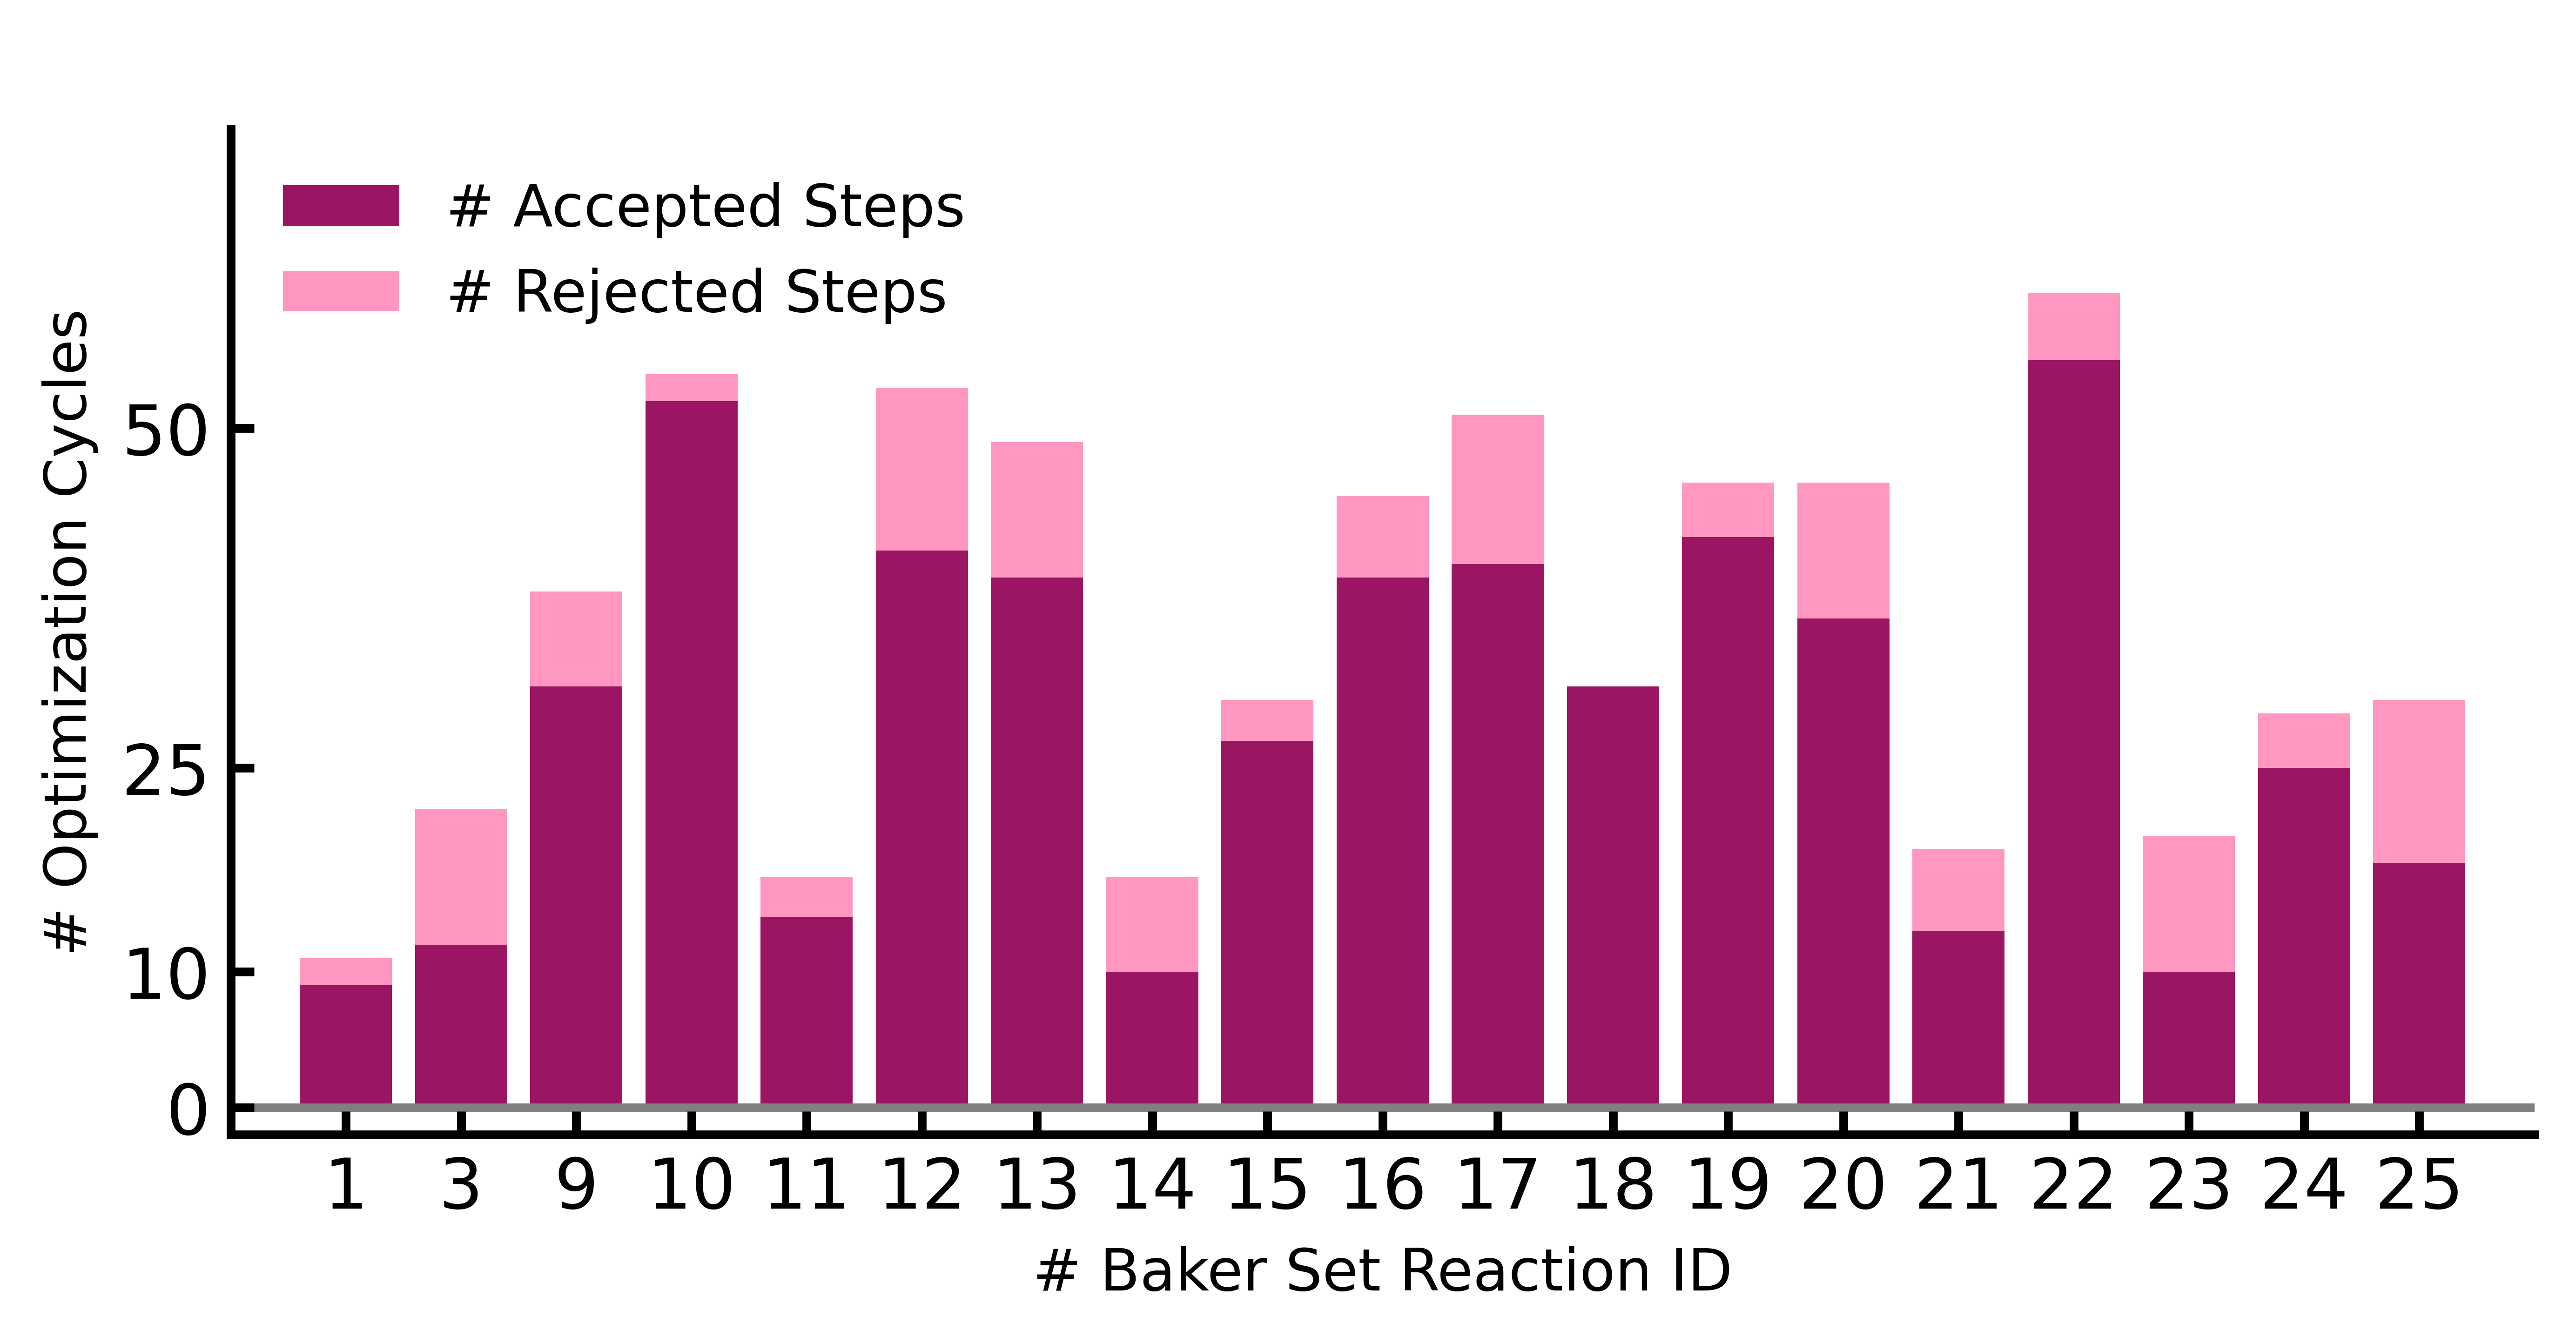

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4), dpi=900)
plt.subplots_adjust(left=1./7., right=6.5/7., top=3.4/4., bottom=1./4.)

ax.tick_params(direction='in', width=1.5, length=4, labelsize=12)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title(" ")

bottom = numpy.zeros((len(rxn_ids), ))
for b, n in n_steps.items():
    ax.bar(rxn_names, n, label=b, bottom=bottom, color="#9A1663" if b=="# Accepted Steps" else "#FF97C1", zorder=0)
    bottom += n

ax.plot([-100, 300], [0, 0], 'gray', lw=1.5, zorder=0)

ax.set(xlim=(-1, 19),
       ylim=(-2,72),   yticks=[0, 10, 25, 50])
ax.set_ylabel('# Optimization Cycles')
ax.set_xlabel('# Baker Set Reaction ID')

leg = plt.legend(loc="upper left", bbox_to_anchor=(0., 1.), frameon=False)

plt.savefig(f'{base_dir}/../baker_convergence.jpeg')